# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## PROJECT STRATEGY

For this project I would be making a four classifiers models and selecting the one with an accuracy score that is higher than 80%. Before modeling I would be scaling and standardising some of the numerical data with standard scaler and PCA The classification models that I would be using are;

    >K-Nearest Neighbour: Based on a given number (k) of the closest surrounding data points, the K-Nearest Neighbor (KNN) method makes predictions. The pre-processing of the data is important in this case since it directly affects the distance measurements. For the data pre-processing stage, I would be standardising the data using standard scaler. The model, unlike others, lacks both a mathematical formula and any descriptive capabilities.
    
    > Ada Boost Classifier: Yoav Freund and Robert Schapire proposed the Ada-boost or Adaptive Boosting ensemble boosting classifier in 1996. To improve classifier accuracy, it combines many classifiers. An iterative ensemble algorithm is AdaBoost. AdaBoost classifier combines a number of ineffective classifiers to create a powerful classifier that has a high degree of accuracy. The fundamental idea underlying Adaboost is to train the data sample and adjust the classifier weights in each iteration in a way that provides accurate predictions of uncommon observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

        *The classifier should be trained interactively on various weighed training examples.
        
        *In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.
    
    > Random Forest Classifier: A Random Forest is a trustworthy combination of many Decision Trees (or CARTs), albeit it is more frequently used in classification applications than in regression ones. The individual trees in this case are separated using fewer features and generated using bagging (i.e., the aggregation of bootstraps, which are nothing more than numerous train datasets created by sampling of records with replacement). The diversified forest of uncorrelated trees that results from this has less variation, making it more resistant to data change and retaining its prediction accuracy for new data.
    Nevertheless, the technique struggles with datasets with a high number of outliers, which must be fixed before developing the model.
    
    > Naive Bayes: While we might not be aware of it, the algorithm that is most frequently employed to sort through spam emails!

    The Bayes Theorem is used to apply a posterior probability in order to categorize the unstructured data. And in doing so, it makes the potentially false assumption that the predictors are independent.

    As long as all of the categorical predictor's classes are available, the model may be trained using a little training dataset.
    

In [1]:

#import libraries
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
#explore the portfolio dataframe
print(portfolio.shape)
portfolio.head()


(10, 6)


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
print(profile.shape)
profile.head()

(17000, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [4]:
print(transcript.shape)
transcript.head()

(306534, 4)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


## DATA CLEANING

In [79]:
# check for missing values
portfolio.isna().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [80]:
#check for duplicates
portfolio['id'].duplicated().sum()

0

In [81]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [82]:
#check for missing values
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [83]:
#fill the missing values of the income column with the mean of the income
income_mean = round(profile['income'].mean())
profile['income'].fillna(value=income_mean, inplace=True)


In [84]:
# fill the gender column with the mode gender
gender_mode = profile['gender'].mode()
profile['gender'].fillna(value = "M", inplace = True)
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,M,68be06ca386d4c31939f3a4f0e3dd783,65405.0
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,M,38fe809add3b4fcf9315a9694bb96ff5,65405.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,M,a03223e636434f42ac4c3df47e8bac43,65405.0


In [85]:
#check for duplicates
profile['id'].duplicated().sum()

0

In [86]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              17000 non-null object
id                  17000 non-null object
income              17000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [87]:
#check for missing values
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [88]:
#check for duplicates
transcript['person'].duplicated().sum()

289534

In [89]:
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [90]:
#get the dummy variable for offer_type
dummy1 = pd.get_dummies(portfolio['offer_type'])
dummy1.head()

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0


In [91]:
portfolio= pd.concat([portfolio, dummy1], axis=1)

In [92]:
portfolio

,channels,difficulty,duration,id,offer_type,reward,bogo,discount,informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,0,1,0
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,0,1,0
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,0,1
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,0,0
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,0,1,0


In [93]:
#get the dummy for channels 
dummy2 = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)

In [94]:
portfolio = pd.concat([portfolio, dummy2], axis=1)
portfolio.head()

,channels,difficulty,duration,id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1,0,0,1


In [95]:
# drop the channels column
portfolio= portfolio.drop(['channels'], axis = 1)

In [96]:
#rename the id column to offer_id
portfolio.rename(columns={"id": "offer_id"}, inplace = True)

In [97]:
portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,0,0,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,0,0,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,0,0,1,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,0,0,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,0,1,0,1,0,0,1


In [98]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              17000 non-null object
id                  17000 non-null object
income              17000 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [99]:
profile.head(2)

,age,became_member_on,gender,id,income
0,118,20170212,M,68be06ca386d4c31939f3a4f0e3dd783,65405.0
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [100]:
# change the data_type of the became_member_on column to datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format="%Y%m%d")

In [101]:
profile.head(2)

,age,became_member_on,gender,id,income
0,118,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,65405.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [102]:
#fill the missing values of the income column with the mean of the income
income_mean = round(profile['income'].mean())
profile['income'].fillna(value=income_mean, inplace=True)

In [103]:
profile.head(2)


,age,became_member_on,gender,id,income
0,118,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,65405.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [104]:
# fill the gender column with the mode gender
gender_mode = profile['gender'].mode()
profile['gender'].fillna(value = gender_mode, inplace = True)
profile.head()

,age,became_member_on,gender,id,income
0,118,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,65405.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,2018-07-12,M,38fe809add3b4fcf9315a9694bb96ff5,65405.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,2017-08-04,M,a03223e636434f42ac4c3df47e8bac43,65405.0


In [105]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [106]:
# get the dummy for the event
dummy3 = pd.get_dummies(transcript['event'])

In [107]:
# concatenate the dummy variable with the transcript data
transcript = pd.concat([transcript, dummy3], axis=1)

In [108]:
transcript.head()

,event,person,time,value,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0


In [109]:
# rename the 'person' column to id for consistency
transcript.rename(columns={"person": "id"}, inplace = True)

In [110]:
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}                  14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}                  14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}                  14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}                  14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}                  14374
{'offer id': '5a8bc65990b245e5a138643cd4eb9837'}                  14305
{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  11848
{'offer id': '3f207df678b143eea3cee63160fa8bed'}                  11761
{'offer id': '2906b810c7d4411798c6938adc9daaa5'}                  11750
{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}                  10331
{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}      5317
{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}      5156
{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}      4354
{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}   

In [111]:
# extract the offer id from the value column
transcript['offer_id'] = transcript['value'].apply(lambda a : a.get('offer_id'))
transcript['offer id'] = transcript['value'].apply(lambda a : a.get('offer id'))


In [112]:
transcript.head()

,event,id,time,value,offer completed,offer received,offer viewed,transaction,offer_id,offer id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0,None,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0,None,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0,None,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0,None,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0,None,4d5c57ea9a6940dd891ad53e9dbe8da0


In [113]:
#merging the 2 columns ('offer id' and 'offer_id')
transcript['offer_id'] = transcript.apply(lambda a : a['offer id'] if a['offer_id'] == None else a['offer_id'],axis = 1)

In [114]:
# drop the value and offer id columns
transcript.drop(['value','offer id'], axis =1, inplace = True)

In [115]:
transcript.head()

,event,id,time,offer completed,offer received,offer viewed,transaction,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [116]:
df = pd.merge(transcript,profile,on='id')
df.head()

,event,id,time,offer completed,offer received,offer viewed,transaction,offer_id,age,became_member_on,gender,income
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,F,100000.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,F,100000.0
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,0,0,0,1,None,75,2017-05-09,F,100000.0
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,F,100000.0
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,0,0,0,1,None,75,2017-05-09,F,100000.0


In [117]:
df['event'].nunique()

4

In [118]:
df_new = pd.merge(df,portfolio, how = 'outer', on = 'offer_id')


In [119]:
df_new['event'].unique()

array(['offer received', 'offer viewed', 'offer completed', 'transaction'], dtype=object)

In [120]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 23 columns):
event               306534 non-null object
id                  306534 non-null object
time                306534 non-null int64
offer completed     306534 non-null uint8
offer received      306534 non-null uint8
offer viewed        306534 non-null uint8
transaction         306534 non-null uint8
offer_id            167581 non-null object
age                 306534 non-null int64
became_member_on    306534 non-null datetime64[ns]
gender              306534 non-null object
income              306534 non-null float64
difficulty          167581 non-null float64
duration            167581 non-null float64
offer_type          167581 non-null object
reward              167581 non-null float64
bogo                167581 non-null float64
discount            167581 non-null float64
informational       167581 non-null float64
email               167581 non-null float64
mobile             

In [121]:
df_new.isna().sum()

event                    0
id                       0
time                     0
offer completed          0
offer received           0
offer viewed             0
transaction              0
offer_id            138953
age                      0
became_member_on         0
gender                   0
income                   0
difficulty          138953
duration            138953
offer_type          138953
reward              138953
bogo                138953
discount            138953
informational       138953
email               138953
mobile              138953
social              138953
web                 138953
dtype: int64

In [122]:
df_new.dropna(axis = 0, inplace = True)

In [123]:
# percentage of completed orders
(df_new['offer completed'].sum()/df_new['offer viewed'].sum())*100


58.170636639237763

## Exploratory Data Analysis



In [124]:
#create a function for the label to avoid repetition of codes
def label (x,y,z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    returns:
    None
    
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
    plt.show()

In [125]:
df_new['income'].min()

30000.0

In [126]:
# BEFORE PLOTTING A HISTOGRM I WOULD SET THE BINS
bins = np.arange(df_new['income'].min(),df_new['income'].max()+100,5000)

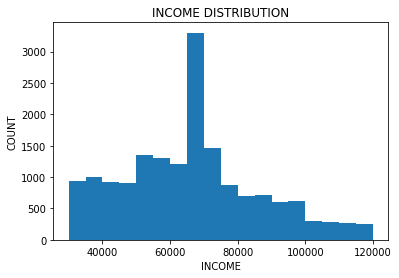

In [127]:
# PLOT THE HISTOGRAM
plt.hist(data = profile, x = 'income', bins = bins)
plt.savefig('income_dis.png', dpi = 100,bbox_inches='tight')
label('INCOME', 'COUNT','INCOME DISTRIBUTION');

The income data is normally distributed

In [128]:
# BEFORE PLOTTING A HISTOGRM I WOULD SET THE BINS
bins = np.arange(0,df_new['age'].max()+10,5)

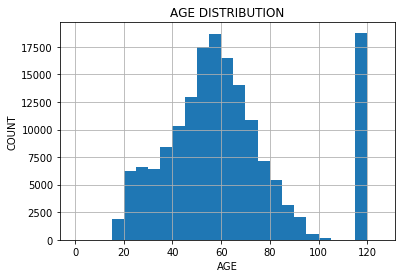

In [129]:
df_new.age.hist(bins = bins)
plt.savefig('age_dis.png', dpi = 100,bbox_inches='tight')
label('AGE','COUNT','AGE DISTRIBUTION')

The age data is normally distributed. there is an outliner in the data

In [130]:
# BEFORE PLOTTING A HISTOGRM I WOULD SET THE BINS
bins = np.arange(0,df_new['time'].max()+10,30)

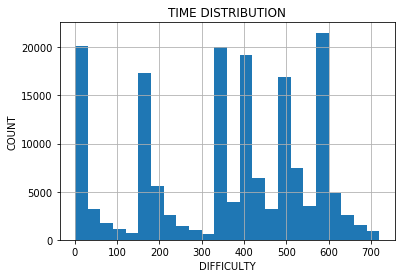

In [131]:
df_new.time.hist(bins = bins)
label('DIFFICULTY','COUNT','TIME DISTRIBUTION');


The time does not follow a particular pattern

In [132]:
import seaborn as sns
# select the color pallete
base_color = sns.color_palette()[0]

In [133]:
# get the order at which the bars are going to be arranged
stat_count = df_new['gender'].value_counts()
stat_count
stat_order = stat_count.index
stat_order

Index(['M', 'F', 'O'], dtype='object')

In [134]:
# scale the data to be percent
n_gender = df_new['gender'].value_counts().sum()
max_count = stat_count[0]
max_prop = max_count / n_gender
max_prop

0.60670362391917942

In [135]:
# set the proportions and tick names
tick_props = np.arange(0,max_prop,0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

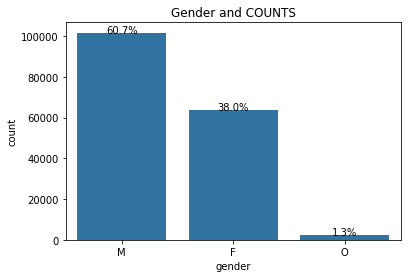

In [136]:
# create a bar chart
sns.countplot(data = df_new, x = 'gender', color = base_color, order = stat_order)
stat_count = df_new['gender'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks()
plt.savefig('gender_dis.png', dpi = 100,bbox_inches='tight')
plt.title('Gender and COUNTS')

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = stat_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_gender)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


The Male gender makes up 52.4% of the data. I left the O gender to include non-binary genders

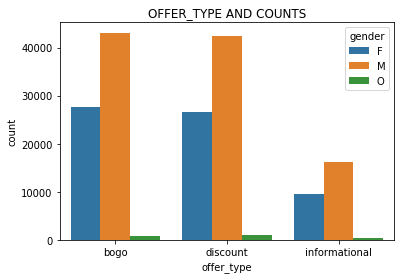

In [137]:
# CREATE A COUNT PLOT OF THE OFFER TYPE
term_order = df_new['offer_type'].value_counts().index
sns.countplot(data = df_new, x='offer_type',hue='gender', order = term_order)
plt.savefig('offer.png', dpi = 100,bbox_inches='tight')
plt.title('OFFER_TYPE AND COUNTS');

The Male gender clearly dominate all the offer_type

# DATA PREPROCESSING

## FEATURE SCALING

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. For this project I would be using the StandardScaler. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [138]:
from sklearn.preprocessing import StandardScaler
# scale the quantitative variables
scaler = StandardScaler()
int_var = ['income', 'difficulty','duration']
df_new[int_var] = scaler.fit_transform(df_new[int_var])

In [139]:
df_new.head()

,event,id,time,offer completed,offer received,offer viewed,transaction,offer_id,age,became_member_on,...,duration,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,offer received,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,68,2018-04-26,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,offer viewed,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,68,2018-04-26,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


## PCA

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed

In [140]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
model = PCA()

pca = model.fit(df_new[int_var])

pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

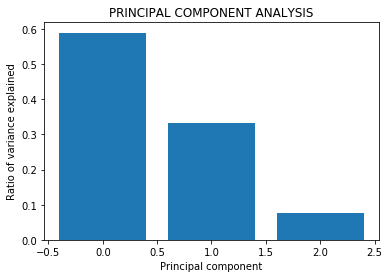

In [141]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("PRINCIPAL COMPONENT ANALYSIS")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.savefig('PCA.png', dpi = 100,bbox_inches='tight')
plt.show()

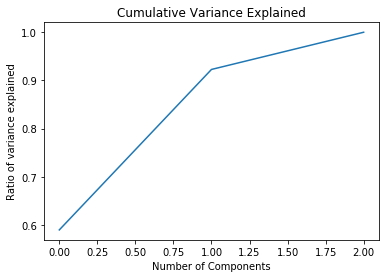

In [142]:
# Investigate the variance accounted for by each principal component.
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.savefig('com_pca.png', dpi = 100,bbox_inches='tight')
plt.show()

# Modeling

Before modeling the data, I did some further feature enginnering

The data would be trained using 4 machine learning models

Random Forest Classifier: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Ada Boost:An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. 

Naive Bayes: Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

K-Nearest Neighbor: KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset.

In [143]:
df_new['event'].unique()

array(['offer received', 'offer viewed', 'offer completed'], dtype=object)

In [144]:
# reengineer the event column
events = {'offer received':0, 'offer viewed':1, 'offer completed':2}

In [145]:
# replace the event values to numerical values
df_new['event'].replace(events, inplace = True)

In [146]:
df_new.head()

,event,id,time,offer completed,offer received,offer viewed,transaction,offer_id,age,became_member_on,...,duration,offer_type,reward,bogo,discount,informational,email,mobile,social,web
0,0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,2017-05-09,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,68,2018-04-26,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,68,2018-04-26,...,0.182228,bogo,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [147]:
#reengineer the gender variable
gender = {'M':0, 'F':1, 'O' :2}

In [148]:
df_new['gender'].replace(gender, inplace = True)

In [149]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306533
Data columns (total 23 columns):
event               167581 non-null int64
id                  167581 non-null object
time                167581 non-null int64
offer completed     167581 non-null uint8
offer received      167581 non-null uint8
offer viewed        167581 non-null uint8
transaction         167581 non-null uint8
offer_id            167581 non-null object
age                 167581 non-null int64
became_member_on    167581 non-null datetime64[ns]
gender              167581 non-null int64
income              167581 non-null float64
difficulty          167581 non-null float64
duration            167581 non-null float64
offer_type          167581 non-null object
reward              167581 non-null float64
bogo                167581 non-null float64
discount            167581 non-null float64
informational       167581 non-null float64
email               167581 non-null float64
mobile              1

## MODELING

The accuracy score will be used to measure the performance of a model or result. Accuracy is perhaps the best-known Machine Learning model validation method used in evaluating classification problems. One reason for its popularity is its relative simplicity. It is easy to understand and easy to implement. Accuracy is a good metric to assess model performance in simple cases.

### PROCESS OF IMPLIMENTATION

First I would split the data to test and train set then I would fit and predict then I would check for the accuracy score 


In [150]:
#establish the X and y variable
X = df_new[['gender','income','time','duration','difficulty','age']]
y = df_new['event']

In [151]:
# split the data to train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(117306, 6) (50275, 6) (117306,) (50275,)


In [152]:
#establish the model
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


model1 = KNeighborsClassifier(n_neighbors = 6)
model2 = RandomForestClassifier(random_state=1)
model3 = AdaBoostClassifier(random_state=1)
model4 = GaussianNB(random_state=1)


In [153]:
#fit the model
model = model1.fit(X_train, Y_train)

In [154]:
# predict
y_pred = model1.predict(X_test)

In [155]:
# accuracy_score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(Y_test,y_pred)
knn_accuracy

0.73571357533565396

In [156]:
model_2 = model2.fit(X_train, Y_train)

In [157]:
# get the acuuracy score of the random forest classifier
y_pred2 = model2.predict(X_test)

rfc_accuracy = accuracy_score(Y_test, y_pred2)

rfc_accuracy

0.62281452013923422

In [158]:
model_3 = model3.fit(X_train, Y_train)

In [159]:
# get the acuuracy score of the Ada classifier
y_pred3 = model3.predict(X_test)

abc_accuracy = accuracy_score(Y_test, y_pred3)

abc_accuracy

0.72564893088015914

In [160]:
#get the accuracy score of the naive bayes classifier
model_4 = model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)

nb_accuracy = accuracy_score(Y_test, y_pred4)

nb_accuracy

0.44749875683739432

In [161]:
data = [['KNN', knn_accuracy], ['RANDOM FOREST',rfc_accuracy ], ['ADA BOOST', abc_accuracy], ['Naive Bayes',nb_accuracy]]

In [162]:

dff = pd.DataFrame(data, columns=['Model', 'Accuracy Score'])

In [163]:
dff

,Model,Accuracy Score
0,KNN,0.735714
1,RANDOM FOREST,0.622815
2,ADA BOOST,0.725649
3,Naive Bayes,0.447499


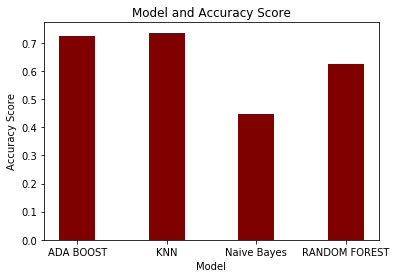

In [164]:
# creating the bar plot
plt.bar(dff['Model'],dff['Accuracy Score'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model and Accuracy Score")
plt.show();

In [165]:
X = df_new[['time','age','gender','income', 'difficulty', 'duration','bogo','discount','informational']]
y = df_new['offer completed']

In [166]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(117306, 9) (50275, 9) (117306,) (50275,)


In [167]:
model_ = model1.fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

knn_acc = accuracy_score(Y_test, y_pred1)

In [168]:
model_2 = model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

rfc_acc = accuracy_score(Y_test, y_pred2)

In [169]:
model_3 = model3.fit(X_train, Y_train)
y_pred3 = model3.predict(X_test)

abc_acc = accuracy_score(Y_test, y_pred3)

In [170]:
model_4 = model4.fit(X_train, Y_train)
y_pred4 = model4.predict(X_test)

nb_acc = accuracy_score(Y_test, y_pred4)

In [171]:
data2 = [['KNN', knn_acc], ['RANDOM FOREST',rfc_acc], ['ADA BOOST', abc_acc], ['Naive Bayes',nb_acc]]

In [172]:
model_df = pd.DataFrame(data, columns=['Model', 'Accuracy Score'])
model_df

,Model,Accuracy Score
0,KNN,0.735714
1,RANDOM FOREST,0.622815
2,ADA BOOST,0.725649
3,Naive Bayes,0.447499


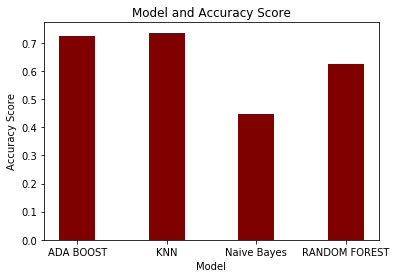

In [173]:
# creating the bar plot
plt.bar(model_df['Model'],model_df['Accuracy Score'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model and Accuracy Score")
plt.show();

The accuaracy scores are quite low with that of the KNN being the most accurate. Futhermore, I would be building a logistic regression model to investigate the data.

In [174]:
df_new['intercept'] = 1

In [175]:
#
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

log_2 = sm.Logit(df_new['offer completed'], df_new[['time','age','gender','income', 'difficulty', 'duration','bogo','discount','informational']])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [176]:
result = log_2.fit()

         Current function value: inf
         Iterations: 35


/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [177]:
result.summary2()

/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/conda/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:               Logit             No. Iterations:    35.0000    
Dependent Variable:  offer completed   Pseudo R-squared:  -inf       
Date:                2023-02-17 09:00  AIC:               inf        
No. Observations:    167581            BIC:               inf        
Df Model:            8                 Log-Likelihood:    -inf       
Df Residuals:        167572            LL-Null:           -4.7344e+07
Converged:           0.0000            Scale:             1.0000     
---------------------------------------------------------------------
               Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
---------------------------------------------------------------------
time            0.0016    0.0000  47.3158 0.0000     0.0015    0.0017
age            -0.0094    0.0003 -33.1942 0.0000    -0.0099   -0.0088
gender          0.2803    0.0124  22.6921 0.0000     0.2561    0.3045
income          0.1978    0.0065  30.6574 0.0000     0.1852    0.2105
difficulty     -0.1476    0.0099 -14.9039 0.0000    -0.1670   -0.1282
duration        0.1398    0.0120  11.6875 0.0000     0.1164    0.1633
bogo           -1.4088    0.0242 -58.2059 0.0000    -1.4562   -1.3613
discount       -1.2604    0.0256 -49.1408 0.0000    -1.3106   -1.2101
informational -27.3125 4794.3074  -0.0057 0.9955 -9423.9822 9369.3573
=====================================================================

"""

All the independent variable are statistically significant. However, the R-square is negative infinite which means the model fits the data poorly. This might be the cause of the poor prediction accuracy score. We can carry out further cleaning exercise not ruling out the poossiblities of adding more independent variable to the model

# RECOMMENDATION AND LIMITATION

I think if more independent variables are added to the models the accuracy score would improve. My model did not include the amount the customer spends on coffee and the demographic data are limited. Also, a further wrangling process can be done on the data. Some hyperparameter tuning can help in improving thr model. I would suggest using grid search as hyperparameter tuner. This is because it is simple to compute and since it does not compute all the hyperparameter combination it is optimises the time spent in tuning.

## CONCLUSION

This project investigates three simulated data from Starbucks and uses a machine learning algorithm to make predictions. First, the individual datasets were explored and all cleanliness and tidiness issues are resolved then the three data sets were combined into a single data frame. The data is scaled using a standard scaler. Before creating the model a few feature engineering processes were carried and some categorical variables were encoded with numbers. Finally, I built a machine learning model to make train, test and made predictions. The first model predicted the events variable, the event variable is divided into three; offer received, offer viewed, and offer complete. This variable is used to track the customer's response to the offer they are given. The machine learning models used are KNN, Ada boost, Random Forest and Naive Bayes. All the models fell short of the required accuracy score of 80%. The second model predicts if the customer completes his offer. I used the same group of ML models and they fell short of the accuracy score threshold. I then created a logistic regression model to see how the offer complete relates to other variables. There is a positive relationship between the offer complete variable and the income, gender, duration and time. This means that as customers' income increases the more likely they are to complete their orders. Also, there is a negative relationship between age, difficulty and the offer type. The difficulty is the minimum amount a customer has to spend before they get an offer. The result of the regression model shows that offers with higher difficulty are less likely to be completed.
However, the logistic regression model has an R square of negative infinity which means that the model does fit the data.


## REFERENCE

https://stackoverflow.com/

https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd

https://stackoverflow.com/questions/9012487/matplotlib-pyplot-savefig-outputs-blank-image

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://datagy.io/pandas-dropna/

https://towardsdatascience.com/pandas-join-vs-merge-c365fd4fbf49

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

https://www.geeksforgeeks.org/how-to-remove-text-inside-brackets-in-python/